In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
prod_data=pd.read_csv("drive/My Drive/productdetails.csv",encoding="ISO-8859-1")
prod_data.head()

,Unnamed: 0,product type,cost per unit,Time for delivery
0,0,1,457,11
1,1,2,1545,13
2,2,3,1910,14
3,3,4,131,9
4,4,5,868,8


In [4]:
product = prod_data.drop(['Unnamed: 0'], axis=1)

In [5]:
product.head()

,product type,cost per unit,Time for delivery
0,1,457,11
1,2,1545,13
2,3,1910,14
3,4,131,9
4,5,868,8


In [6]:
product.describe()

,product type,cost per unit,Time for delivery
count,1115.00000,1115.000000,1115.000000
mean,558.00000,1012.735426,9.542601
std,322.01708,565.696913,2.857276
min,1.00000,50.000000,5.000000
25%,279.50000,502.500000,7.000000
50%,558.00000,1024.000000,10.000000
75%,836.50000,1517.500000,12.000000
max,1115.00000,1999.000000,14.000000


In [7]:
product['product type'].notnull().unique()

array([ True])

In [8]:
product['cost per unit'].isnull().unique()

array([False])

In [9]:
product['Time for delivery'].isnull().unique()

array([False])

In [10]:
import matplotlib.pyplot as plt

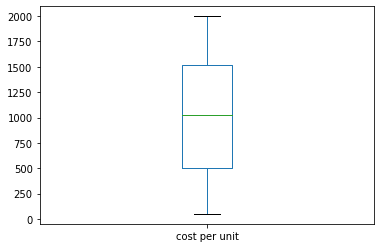

In [11]:
product[['cost per unit']].plot.box()

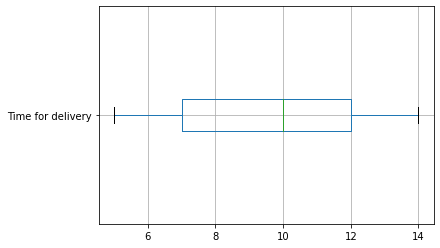

In [12]:
product[['Time for delivery']].plot.box(vert = False, grid = True)

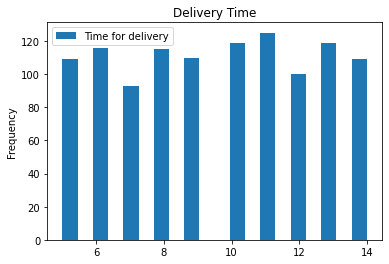

In [13]:
product[['Time for delivery']].plot.hist(bins = 20, title = 'Delivery Time')

In [15]:
corr = product[['product type','cost per unit','Time for delivery']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,product type,cost per unit,Time for delivery
product type,1.00,-0.04,-0.02
cost per unit,-0.04,1.00,0.02
Time for delivery,-0.02,0.02,1.00


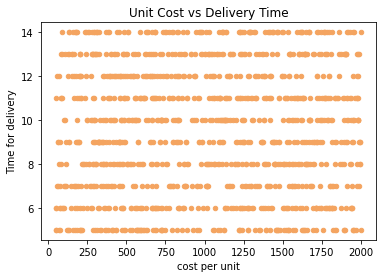

In [16]:
product.plot.scatter(x = 'cost per unit', y = 'Time for delivery',
                  color = 'sandybrown', title = 'Unit Cost vs Delivery Time')

In [17]:
rev_data = pd.read_csv("drive/My Drive/prorevenue.csv",encoding="ISO-8859-1")
rev_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,1,14190,890,open,1,0,1,5
1,2,6064,789,open,1,0,1,5
2,3,14190,821,open,1,0,1,5
3,4,13995,456,open,1,0,1,5
4,5,4822,559,open,1,0,1,5


In [18]:
rev_data.count()

Product type         1017209
Revenue              1017209
No of purchases      1017209
store status         1017209
Promotion applied    1017209
Generic Holiday      1017209
Education Holiday    1017209
DayOfWeek            1017209
dtype: int64

In [19]:
rev_data['store status'].isnull().unique()

array([False])

In [20]:
rev_data['store status'].unique()

array(['open', 'close'], dtype=object)

In [21]:
status = {'open': 1,'close': 2}

In [22]:
rev_data['store status'] = [status[item] for item in rev_data['store status']]

In [23]:
rev_data.head()

,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,1,14190,890,1,1,0,1,5
1,2,6064,789,1,1,0,1,5
2,3,14190,821,1,1,0,1,5
3,4,13995,456,1,1,0,1,5
4,5,4822,559,1,1,0,1,5


In [24]:
rev_data['Promotion applied'].unique()

array([1, 0])

In [25]:
rev_data['Generic Holiday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [26]:
index_gh = rev_data[ rev_data['Generic Holiday'] == 'a' ].index

In [27]:
rev_data.drop(index_gh, inplace = True)

In [28]:
rev_data.tail()

,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
1016090,1111,5097,505,1,0,0,1,3
1016091,1112,10797,892,1,0,0,1,3
1016092,1113,6218,753,1,0,0,1,3
1016093,1114,20642,3401,1,0,0,1,3
1016094,1115,3697,305,1,0,0,1,3


In [29]:
rev_data['Generic Holiday'].unique()

array(['0', 'b', 'c', 0], dtype=object)

In [30]:
index_gh = rev_data[ rev_data['Generic Holiday'] == 'b' ].index
rev_data.drop(index_gh, inplace = True)

In [31]:
index_gh = rev_data[ rev_data['Generic Holiday'] == 'c' ].index
rev_data.drop(index_gh, inplace = True)

In [32]:
rev_data.count()

Product type         986159
Revenue              986159
No of purchases      986159
store status         986159
Promotion applied    986159
Generic Holiday      986159
Education Holiday    986159
DayOfWeek            986159
dtype: int64

In [33]:
rev_data.dtypes

Product type          int64
Revenue               int64
No of purchases       int64
store status          int64
Promotion applied     int64
Generic Holiday      object
Education Holiday     int64
DayOfWeek             int64
dtype: object

In [34]:
rev_data['Generic Holiday'] = rev_data['Generic Holiday'].astype(int)

In [35]:
rev_data.dtypes

Product type         int64
Revenue              int64
No of purchases      int64
store status         int64
Promotion applied    int64
Generic Holiday      int64
Education Holiday    int64
DayOfWeek            int64
dtype: object

In [36]:
rev_data['Generic Holiday'].unique()

array([0])

In [37]:
rev_data['Education Holiday'].unique()

array([1, 0])

In [38]:
rev_data['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [39]:
rev_data.head(10)

,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,1,14190,890,1,1,0,1,5
1,2,6064,789,1,1,0,1,5
2,3,14190,821,1,1,0,1,5
3,4,13995,456,1,1,0,1,5
4,5,4822,559,1,1,0,1,5
5,6,5651,236,1,1,0,1,5
6,7,15344,1414,1,1,0,1,5
7,8,8492,833,1,1,0,1,5
8,9,13213,657,1,1,0,1,5
9,10,7185,681,1,1,0,1,5


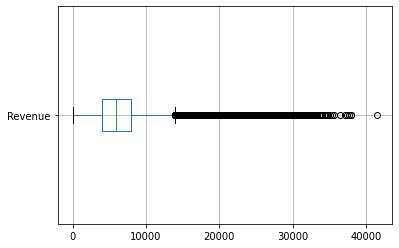

In [42]:
rev_data[['Revenue']].plot.box(vert = False, grid = True)

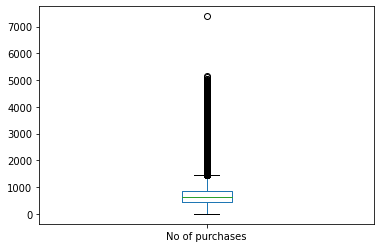

In [43]:
rev_data[['No of purchases']].plot.box()

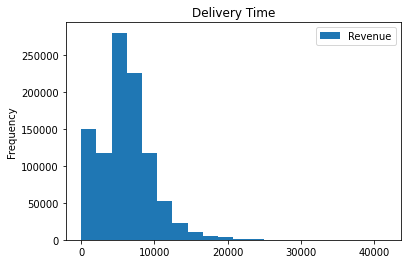

In [44]:
rev_data[['Revenue']].plot.hist(bins = 20, title = 'Delivery Time')

In [50]:
rev_corr = rev_data[['Product type','Revenue','No of purchases','store status','Promotion applied','Education Holiday','DayOfWeek']].corr()
rev_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Product type,Revenue,No of purchases,store status,Promotion applied,Education Holiday,DayOfWeek
Product type,1.00,0.01,0.03,0.00,0.00,0.00,-0.00
Revenue,0.01,1.00,0.89,-0.65,0.47,0.13,-0.50
No of purchases,0.03,0.89,1.00,-0.59,0.33,0.11,-0.42
store status,0.00,-0.65,-0.59,1.00,-0.32,-0.16,0.60
Promotion applied,0.00,0.47,0.33,-0.32,1.00,0.08,-0.41
Education Holiday,0.00,0.13,0.11,-0.16,0.08,1.00,-0.21
DayOfWeek,-0.00,-0.50,-0.42,0.60,-0.41,-0.21,1.00
